In [1]:
%pylab inline

from library import lasagnennet as LN
from library import features as F
from library import scale as S
from library import validate as V
import numpy as np
import theano as TH
import pandas as pa
import lasagne as L

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_feats = pa.read_csv('train_feats.csv')
train_targets = pa.read_csv('train_targets.csv')
val_feats = pa.read_csv('validation_feats.csv')
val_targets = pa.read_csv('validation_targets.csv')

In [3]:
tx = np.asarray(train_feats, dtype=TH.config.floatX)
tyall = np.asarray(train_targets, dtype=TH.config.floatX)
ty = np.asarray(train_targets['LABEL'], dtype=TH.config.floatX).reshape(-1, 1)
vx = np.asarray(val_feats, dtype=TH.config.floatX)
vyall = np.asarray(val_targets, dtype=TH.config.floatX)
vy = np.asarray(val_targets['LABEL'], dtype=TH.config.floatX).reshape(-1, 1)

In [4]:
ty = ty.ravel()
vy = vy.ravel()

In [9]:
from sklearn import svm
from sklearn.metrics import roc_curve

In [16]:
clf = svm.SVC(verbose=True, max_iter=200, class_weight={0:1, 1:3}, probability=True)
clf.fit(tx, ty)

[LibSVM]

/home/biswajit/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:204: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight={0: 1, 1: 3}, coef0=0.0, degree=3,
  gamma=0.0, kernel='rbf', max_iter=200, probability=True,
  random_state=None, shrinking=True, tol=0.001, verbose=True)

In [17]:
probs = clf.predict_proba(vx)

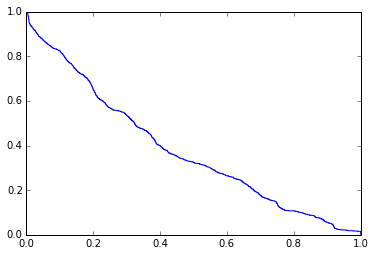

In [18]:
yscore = probs[:,1]
fpr, tpr, thresh = roc_curve(vy, yscore)
pyplot.plot(1-fpr, tpr)

In [19]:
thresh = np.percentile(probs[:,1], 99.99)
pred = np.int32(probs[:,1]>=thresh)
print np.sum(pred)

7


In [20]:
output = vyall.swapaxes(0,1)
output[2] = pred
output = output.swapaxes(0,1)

In [21]:
outfile = open('out.csv', 'w')
outfile.write('ID,TIME,LABEL,ICU\n')
for i in output:
    outfile.write(','.join([str(int(j)) for j in i])+'\n')
outfile.close()

In [22]:
reload(V)
V.validate('out.csv', './Training_Dataset/id_label_train.csv')

tp :  1 , tn :  857 , fp :  1 , fn :  60
sensitivity :  0.016393442623 , specificity :  0.998834498834
accuracy :  0.933623503808 median prediction time :  8138.5
specificity < 0.99 or sensitivity = 0            or medianPredictionTime < 5
finalScore :  0


(0.01639344262295082, 0.9988344988344988, 0.9336235038084875, 8138.5, 0)